# Import Packages:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

#Common Model Helpers
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import models
from keras import layers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input, Activation, Dense, Flatten

# 1. Initialization of Data:

In [2]:
mnist = keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [4]:
print(f'The shape of the data is {X_train_full.shape}')
print(f'The array is the following 28 * 28 = {28*28}')
print()
print(f'The datatype is the following: {X_train_full.dtype}')

The shape of the data is (60000, 28, 28)
The array is the following 28 * 28 = 784

The datatype is the following: uint8


In [5]:
print(f'Shape of training data: {X_train_full.shape}')
print()
print(f'Shape of training data: {y_train_full.shape}')

Shape of training data: (60000, 28, 28)

Shape of training data: (60000,)


### 1.1 Split Full Set into Train/Validation Sets:

In [6]:
X_train_copy = X_train_full

In [7]:
X_train_full = X_train_full.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train_full = X_train_full.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_valid = X_train_full[:5000]
X_train = X_train_full[5000:]

y_valid = y_train_full[:5000] 
y_train = y_train_full[5000:] 

In [9]:
print(f'Shape of training data after split: {X_train.shape}')
print(f'Shape of validation data after split: {X_valid.shape}')
print(f'The max pixel within the dataset is: {X_train.max()}')
print(f'The min pixel within the dataset is: {X_train.min()}')

print()
print(f'Shape of training data after split: {y_train.shape}')
print(f'Shape of validation data after split: {y_valid.shape}')

Shape of training data after split: (55000, 784)
Shape of validation data after split: (5000, 784)
The max pixel within the dataset is: 255.0
The min pixel within the dataset is: 0.0

Shape of training data after split: (55000,)
Shape of validation data after split: (5000,)


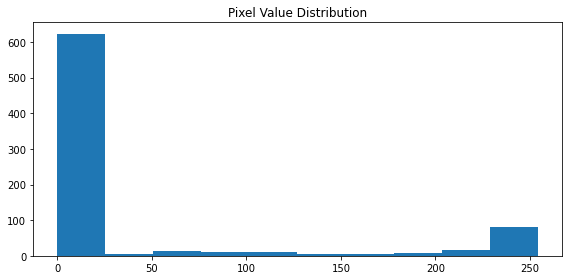

In [10]:
fig = plt.figure(figsize = (8,4))
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

plt.tight_layout()
plt.show()

### 1.2 Normalize Data:

In [11]:
X_train = X_train /255.0 #Rescale the pixel data
X_valid = X_valid / 255.0

In [12]:
print(f'Min pixel after rescaling: {X_train.min()}')
print(f'Max pixel after rescaling : {X_train.max()}')

Min pixel after rescaling: 0.0
Max pixel after rescaling : 1.0


# 2. Image Peek:

In [13]:
class_names = [i for i in range(10)]
n_unique = np.unique(y_train)
print(f'The number of unique digits in the dataset is: {len(n_unique)}: {n_unique}')

The number of unique digits in the dataset is: 10: [0 1 2 3 4 5 6 7 8 9]


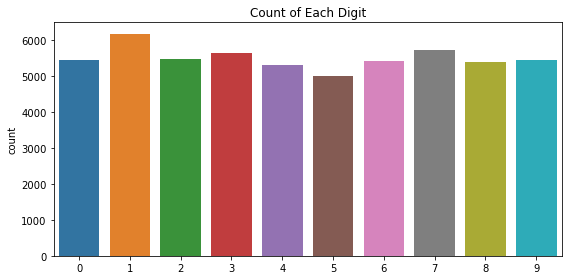

In [14]:
fig, ax = plt.subplots(figsize = (8,4))
sns.countplot(y_train)
plt.title('Count of Each Digit')

plt.tight_layout()
plt.show()

In [15]:
print(y_train[0])
print(y_train[1])
print(y_train[np.random.randint(y_train.shape[0])])

7
3
3


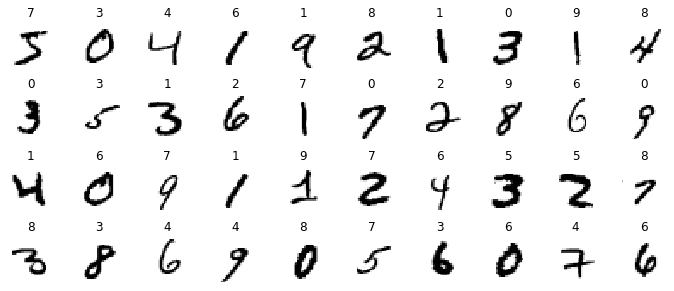

In [115]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_copy[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 3. Modelling:

### 3.1 Three-Layer Sequential Model:

In [17]:
simple_model = keras.models.Sequential([
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [18]:
simple_model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [19]:
simple_history = simple_model.fit(X_train,y_train, validation_data = (X_valid, y_valid), epochs = 10)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 162us/step - loss: 0.6137 - accuracy: 0.8405 - val_loss: 0.2992 - val_accuracy: 0.9200
Epoch 2/10
55000/55000 [==============================] - 9s 172us/step - loss: 0.2848 - accuracy: 0.9187 - val_loss: 0.2338 - val_accuracy: 0.9348
Epoch 3/10
55000/55000 [==============================] - 9s 163us/step - loss: 0.2336 - accuracy: 0.9337 - val_loss: 0.2075 - val_accuracy: 0.9392
Epoch 4/10
55000/55000 [==============================] - 9s 171us/step - loss: 0.2008 - accuracy: 0.9429 - val_loss: 0.1746 - val_accuracy: 0.9514
Epoch 5/10
55000/55000 [==============================] - 10s 181us/step - loss: 0.1762 - accuracy: 0.9498 - val_loss: 0.1573 - val_accuracy: 0.9554
Epoch 6/10
55000/55000 [==============================] - 9s 169us/step - loss: 0.1568 - accuracy: 0.9548 - val_loss: 0.1432 - val_accuracy: 0.9604
Epoch 7/10
55000/55000 [==============================] - 10s 

In [20]:
simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


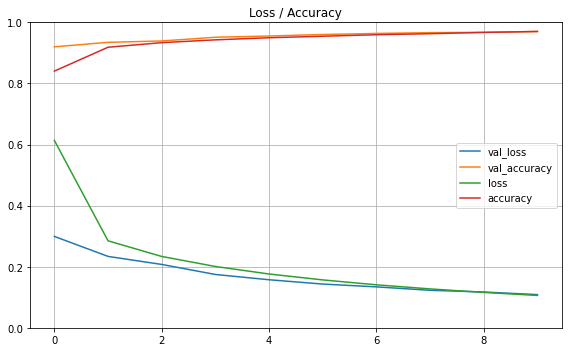

In [21]:
pd.DataFrame(simple_history.history).plot(figsize=(8, 5))
plt.title('Loss / Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.tight_layout()
plt.show()

In [22]:
simple_predictions = simple_model.predict(X_test)

In [23]:
loss_metrics_simple = simple_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 67us/step


In [24]:
print(f'Loss, {round(loss_metrics_simple[0],4)}')
print(f'Test Accuracy, {round(loss_metrics_simple[1],4)}')

Loss, 16.9906
Test Accuracy, 0.9636


In [25]:
simple_y_pred = simple_model.predict_classes(X_test)
simple_y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### 3.2 N-Layer Sequential Model:

In [26]:
def build_model(n_hidden=1, n_neurons=30):
    model = keras.models.Sequential()
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10,activation = 'softmax'))
    model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd',metrics = ['accuracy'])
    return model

In [27]:
complex_model = build_model(n_hidden = 8, n_neurons = 200)
complexmodel = complex_model.fit(X_train,y_train,epochs = 30, validation_data = (X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 13s 234us/step - loss: 1.0778 - accuracy: 0.6646 - val_loss: 0.3013 - val_accuracy: 0.9134
Epoch 2/30
55000/55000 [==============================] - 16s 291us/step - loss: 0.2590 - accuracy: 0.9226 - val_loss: 0.1726 - val_accuracy: 0.9510
Epoch 3/30
55000/55000 [==============================] - 15s 267us/step - loss: 0.1737 - accuracy: 0.9477 - val_loss: 0.1376 - val_accuracy: 0.9588
Epoch 4/30
55000/55000 [==============================] - 13s 244us/step - loss: 0.1317 - accuracy: 0.9611 - val_loss: 0.1255 - val_accuracy: 0.9632
Epoch 5/30
55000/55000 [==============================] - 15s 275us/step - loss: 0.1064 - accuracy: 0.9684 - val_loss: 0.1158 - val_accuracy: 0.9660
Epoch 6/30
55000/55000 [==============================] - 15s 273us/step - loss: 0.0890 - accuracy: 0.9741 - val_loss: 0.0935 - val_accuracy: 0.9732
Epoch 7/30
55000/55000 [==============================] -

In [28]:
complex_predictions = complex_model.predict(X_test)

In [29]:
loss_metrics_complex = complex_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 91us/step


In [30]:
print(f'Loss, {round(loss_metrics_complex[0],4)}')
print(f'Test Accuracy, {round(loss_metrics_complex[1],4)}')

Loss, 19.3554
Test Accuracy, 0.9725


In [31]:
complex_y_pred = complex_model.predict_classes(X_test)
complex_y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

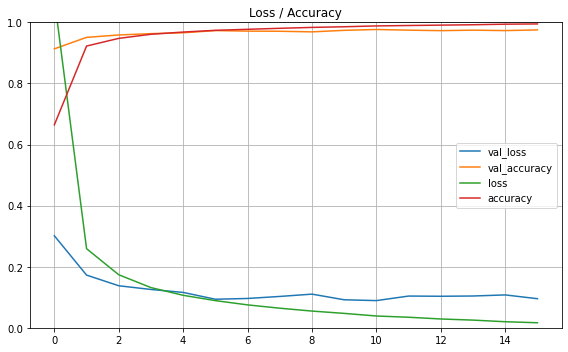

In [32]:
pd.DataFrame(complexmodel.history).plot(figsize=(8, 5))
plt.title('Loss / Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.tight_layout()
plt.show()

### 3.3 ConvNet:

In [46]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(55000, 784)
(5000, 784)
(55000,)
(5000,)
(10000, 784)
(10000,)


In [47]:
X_train = X_train.reshape((55000,28,28,1))
X_valid = X_valid.reshape((5000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [48]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(55000, 28, 28, 1)
(5000, 28, 28, 1)
(55000,)
(5000,)
(10000, 28, 28, 1)
(10000,)


In [59]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [60]:
model.fit(X_train,y_train,epochs = 30, validation_data = (X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 70s 1ms/step - loss: 0.1492 - accuracy: 0.9529 - val_loss: 0.0556 - val_accuracy: 0.9830
Epoch 2/30
55000/55000 [==============================] - 63s 1ms/step - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0391 - val_accuracy: 0.9892
Epoch 3/30
55000/55000 [==============================] - 68s 1ms/step - loss: 0.0331 - accuracy: 0.9903 - val_loss: 0.0333 - val_accuracy: 0.9910
Epoch 4/30
55000/55000 [==============================] - 69s 1ms/step - loss: 0.0256 - accuracy: 0.9924 - val_loss: 0.0396 - val_accuracy: 0.9880
Epoch 5/30
55000/55000 [==============================] - 71s 1ms/step - loss: 0.0205 - accuracy: 0.9941 - val_loss: 0.0443 - val_accuracy: 0.9898
Epoch 6/30
55000/55000 [==============================] - 70s 1ms/step - loss: 0.0179 - accuracy: 0.9950 - val_loss: 0.0909 - val_accuracy: 0.9774
Epoch 7/30
55000/55000 [==============================] - 72s 1ms/ste

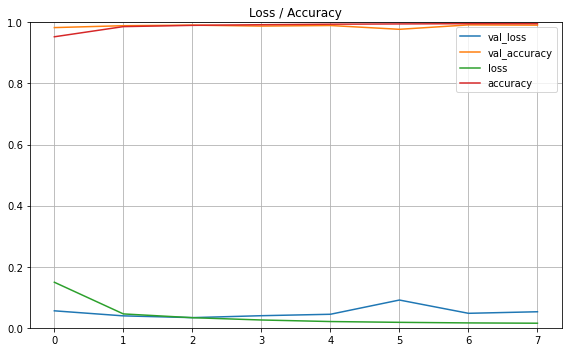

In [62]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.title('Loss / Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.tight_layout()
plt.show()

In [63]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 350us/step


In [84]:
print(test_acc)

0.37279999256134033


# 4. ConvNet with Kaggle Data:

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.isna().sum().sum()

0

In [8]:
test.isna().sum().sum()

0

In [9]:
y = train['label']

In [10]:
train = train.drop('label',axis = 1)

In [11]:
print(train.shape)
print(test.shape)

(42000, 784)
(28000, 784)


In [12]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train = train.to_numpy()
test = test.to_numpy()

In [15]:
print(train.max())
print(train.min())

255
0


In [16]:
train = train.reshape((42000, 28, 28, 1))
train = train / 255.0

test = test.reshape((28000, 28, 28, 1))
test = test / 255.0

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size=0.20, train_size=0.80, random_state=42)

In [18]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600,)
(8400,)


In [93]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (1,1), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [94]:
model.fit(X_train,y_train,epochs = 30, validation_data = (X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 42s 1ms/step - loss: 0.3104 - accuracy: 0.9025 - val_loss: 0.1135 - val_accuracy: 0.9664
Epoch 2/30
33600/33600 [==============================] - 43s 1ms/step - loss: 0.0936 - accuracy: 0.9712 - val_loss: 0.0785 - val_accuracy: 0.9755
Epoch 3/30
33600/33600 [==============================] - 45s 1ms/step - loss: 0.0651 - accuracy: 0.9797 - val_loss: 0.0675 - val_accuracy: 0.9790
Epoch 4/30
33600/33600 [==============================] - 44s 1ms/step - loss: 0.0540 - accuracy: 0.9837 - val_loss: 0.0582 - val_accuracy: 0.9848
Epoch 5/30
33600/33600 [==============================] - 43s 1ms/step - loss: 0.0425 - accuracy: 0.9875 - val_loss: 0.0854 - val_accuracy: 0.9792
Epoch 6/30
33600/33600 [==============================] - 43s 1ms/step - loss: 0.0375 - accuracy: 0.9890 - val_loss: 0.0626 - val_accuracy: 0.9824
Epoch 7/30
33600/33600 [==============================] - 43s 1ms/ste

# 5. Dropout - Data Augmentation:

In [28]:
def build_model():
        model = Sequential()
                
        model.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)))
                                       
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(Conv2D(filters=64,kernel_size=(6,6),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        
        model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(Conv2D(filters=128,kernel_size=(6,6),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        
        model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(Conv2D(filters=256,kernel_size=(6,6),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        
        model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(SpatialDropout2D(0.25))
        
        model.add(Flatten())
        
        model.add(Dense(256))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.25))
        
        model.add(Dense(10))
        model.add(Activation("softmax"))
        
        optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
        model.compile(optimizer = 'rmsprop' ,metrics=["accuracy"], loss = "sparse_categorical_crossentropy")
        
        return model

In [29]:
model = build_model()

In [23]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)
datagen.fit(X_train)

In [24]:
callback_lr = ReduceLROnPlateau(monitor='val_acc',patience=2,factor=0.5,min_lr=0.00001,verbose=1)
epochs = 1
batch_size = 256

In [26]:
history = model.fit_generator(datagen.flow(X_train,y_train),epochs = epochs, validation_data = (X_valid,y_valid),
                              verbose = 1, callbacks=[callback_lr])

Epoch 1/1
  42/1050 [>.............................] - ETA: 47:49 - loss: 0.8693 - accuracy: 0.7173

KeyboardInterrupt: 

# 6. Machine Learning:

In [40]:
print(X_train.shape)
print(X_valid.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)


In [44]:
x_train = X_train.reshape((33600, 28*28))
x_valid = X_valid.reshape((8400, 28*28))

In [53]:
x_test = test.reshape((28000, 28*28))

In [48]:
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(x_train, y_train)
forest_predictions = forest.predict(x_train)

print("\nAccuracy Score for Random Forest Classifier is: " + str(forest.score(x_valid, y_valid)))


Accuracy Score for Random Forest Classifier is: 0.963452380952381


In [54]:
results = forest.predict(x_test)

In [66]:
pred = pd.Series(results,name="Label")

In [68]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_rf.csv",index=False)

# 7. Submission:

In [22]:
sample = pd.read_csv('sample_submission.csv')

In [23]:
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [50]:
predictions = model.predict(test)

KeyboardInterrupt: 

In [30]:
predictions = np.argmax(predictions,axis = 1)

In [31]:
predictions = pd.Series(predictions,name="Label")

In [32]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)

submission.to_csv("cnn_mnist.csv",index=False)